<a href="https://www.kaggle.com/code/himanshunakrani/grip-task-1?scriptVersionId=101378845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/student-study-hours/score.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
X = data.drop(columns = ['Scores'], axis = 1)
y = data.drop(columns = ['Hours'], axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
acc = model.score(X_test, y_test)

In [8]:
acc*100

96.78055545167994

In [9]:
model.predict([[9.25]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[92.38611528]])

In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred.reshape(-1, 1)

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

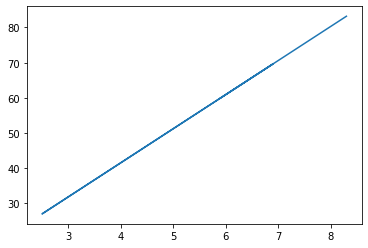

In [12]:
plt.plot(X_test, y_pred)